# Train 데이터 읽기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('movies_train.csv')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 필요 없는 속성 제거

In [ ]:
df.drop(columns=['title','release_time','time','director'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


## 결측치 0으로 처리

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  600 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


## 카테고리화

In [ ]:
df.distributor = df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes

In [ ]:
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

In [ ]:
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [ ]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,23398,80,10,3
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,7072501,21,2,3
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,6959083,21,10,1
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,217866,6,11,2
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,483387,96,11,1


- suffle
- log 스케일 변화
- 카테고리 코드를 onehot 인코딩
- 불필요 컬럼 삭제
- numpy 변환
- x,y 나누기
- train,test 나누기

## shuffle

In [ ]:
df = df.sample(frac=1)  # row 전체 shuffle
df = df.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

## log 스케일 변화

#### 값이 0인 칼럼은 log변환할때 에러가 발생한다.

In [ ]:
df.loc[df.dir_prev_bfnum==0, 'dir_prev_bfnum'] = 1
df.loc[df.num_staff==0, 'num_staff'] = 1
df.loc[df.box_off_num==0, 'box_off_num'] = 1

In [ ]:
df['dir_prev_bfnum_log'] = np.log(df.dir_prev_bfnum)
df['num_staff_log'] = np.log(df.num_staff)
df['box_off_num_log'] = np.log(df.box_off_num)

In [ ]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code,dir_prev_bfnum_log,num_staff_log,box_off_num_log
0,나이너스엔터테인먼트(주),드라마,12세 관람가,1.0,0,206,4,47105,69,4,0,0.000000,5.327876,10.760134
1,(주)NEW,멜로/로맨스,15세 관람가,1.0,0,340,3,4598985,6,5,1,0.000000,5.828946,15.341346
2,영화사 조아,멜로/로맨스,전체 관람가,1.0,0,21,2,20081,123,5,2,0.000000,3.044522,9.907529
3,유니버설픽쳐스인터내셔널코리아,뮤지컬,전체 관람가,1.0,0,3,5,4778,132,6,2,0.000000,1.098612,8.471777
4,필라멘트 픽쳐스,드라마,12세 관람가,4074.0,2,244,3,24020,163,4,0,8.312381,5.497168,10.086642


## 카테고리 코드를 onehot 인코딩

In [ ]:
df = pd.get_dummies(df, columns=['distributor_code'])
df = pd.get_dummies(df, columns=['genre_code'])
df = pd.get_dummies(df, columns=['screening_rat_code'])

In [ ]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,distributor_code_0,distributor_code_1,distributor_code_2,distributor_code_3,distributor_code_4,distributor_code_5,distributor_code_6,distributor_code_7,distributor_code_8,distributor_code_9,distributor_code_10,distributor_code_11,distributor_code_12,distributor_code_13,distributor_code_14,distributor_code_15,distributor_code_16,distributor_code_17,distributor_code_18,distributor_code_19,distributor_code_20,distributor_code_21,distributor_code_22,distributor_code_23,distributor_code_24,distributor_code_25,distributor_code_26,distributor_code_27,distributor_code_28,...,distributor_code_145,distributor_code_146,distributor_code_147,distributor_code_148,distributor_code_149,distributor_code_150,distributor_code_151,distributor_code_152,distributor_code_153,distributor_code_154,distributor_code_155,distributor_code_156,distributor_code_157,distributor_code_158,distributor_code_159,distributor_code_160,distributor_code_161,distributor_code_162,distributor_code_163,distributor_code_164,distributor_code_165,distributor_code_166,distributor_code_167,distributor_code_168,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,나이너스엔터테인먼트(주),드라마,12세 관람가,1.0,0,206,4,47105,0.000000,5.327876,10.760134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,(주)NEW,멜로/로맨스,15세 관람가,1.0,0,340,3,4598985,0.000000,5.828946,15.341346,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,영화사 조아,멜로/로맨스,전체 관람가,1.0,0,21,2,20081,0.000000,3.044522,9.907529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,유니버설픽쳐스인터내셔널코리아,뮤지컬,전체 관람가,1.0,0,3,5,4778,0.000000,1.098612,8.471777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,필라멘트 픽쳐스,드라마,12세 관람가,4074.0,2,244,3,24020,8.312381,5.497168,10.086642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 196 entries, distributor to screening_rat_code_3
dtypes: category(3), float64(4), int64(4), uint8(185)
memory usage: 155.3 KB


## 불필요 컬럼 삭제

In [ ]:
df.drop(columns=['distributor','genre','screening_rat','dir_prev_bfnum','num_staff'], inplace=True)

In [ ]:
df.head()

,dir_prev_num,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,distributor_code_0,distributor_code_1,distributor_code_2,distributor_code_3,distributor_code_4,distributor_code_5,distributor_code_6,distributor_code_7,distributor_code_8,distributor_code_9,distributor_code_10,distributor_code_11,distributor_code_12,distributor_code_13,distributor_code_14,distributor_code_15,distributor_code_16,distributor_code_17,distributor_code_18,distributor_code_19,distributor_code_20,distributor_code_21,distributor_code_22,distributor_code_23,distributor_code_24,distributor_code_25,distributor_code_26,distributor_code_27,distributor_code_28,distributor_code_29,distributor_code_30,distributor_code_31,distributor_code_32,distributor_code_33,...,distributor_code_145,distributor_code_146,distributor_code_147,distributor_code_148,distributor_code_149,distributor_code_150,distributor_code_151,distributor_code_152,distributor_code_153,distributor_code_154,distributor_code_155,distributor_code_156,distributor_code_157,distributor_code_158,distributor_code_159,distributor_code_160,distributor_code_161,distributor_code_162,distributor_code_163,distributor_code_164,distributor_code_165,distributor_code_166,distributor_code_167,distributor_code_168,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,0,4,47105,0.000000,5.327876,10.760134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,3,4598985,0.000000,5.828946,15.341346,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,2,20081,0.000000,3.044522,9.907529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0,5,4778,0.000000,1.098612,8.471777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2,3,24020,8.312381,5.497168,10.086642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


## Standardization

In [ ]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num']  = (df['dir_prev_num']  - df['dir_prev_num'] .mean()) / df['dir_prev_num'] .std()
df['num_actor']  = (df['num_actor']  - df['num_actor'] .mean()) / df['num_actor'] .std()
df['dir_prev_bfnum_log']  = (df['dir_prev_bfnum_log']  - df['dir_prev_bfnum_log'] .mean()) / df['dir_prev_bfnum_log'] .std()
df['num_staff_log']  = (df['num_staff_log']  - df['num_staff_log'] .mean()) / df['num_staff_log'] .std()

## numpy 변환

In [ ]:
y = df.box_off_num_log.to_numpy()
df.drop(columns=['box_off_num','box_off_num_log'], inplace=True)
x = df.to_numpy()

In [ ]:
print(x.shape)
print(y.shape)

(600, 189)
(600,)


## train, test 분리

In [ ]:
i = int(len(x)*0.8)
train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

## 딥러닝 학습

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 10)                1900      
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 5.8470 - mape: 29.9665 - root_mean_squared_error: 2.4181
loss= 5.847015857696533
mape= 29.966514587402344
RMSE= 2.418060302734375


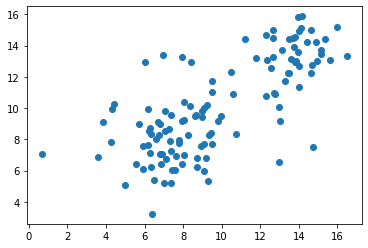

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(x.shape[1],)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape", RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, validation_split=0.1, verbose=0)

loss, mape, RMSE = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
print("RMSE=", RMSE)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

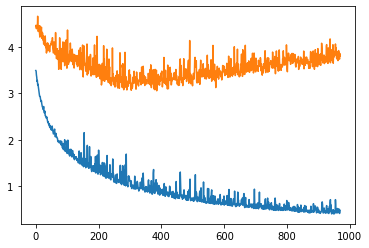

In [ ]:
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.show()

## RMSE 해보기

In [ ]:
predicted = np.exp(y_)
org_test_y = np.exp(test_y)

rmse = RootMeanSquaredError()
result_rmse = rmse(predicted, org_test_y)

print(result_rmse)

tf.Tensor(1849675.9, shape=(), dtype=float32)


# Test 데이터 읽기

In [ ]:
train_df = pd.read_csv('movies_train.csv')

In [ ]:
df = pd.read_csv('movies_test.csv')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
train_data_count = len(train_df)
test_data_count = len(df)

print(train_data_count)
print(test_data_count)

600
243


In [ ]:
df = pd.concat([train_df, df])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## dummy y컬럼 추가

In [ ]:
df['box_off_num'] = df.dir_prev_num

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     843 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 85.6+ KB


## 필요 없는 속성 제거

In [ ]:
df.drop(columns=['title','release_time','time','director'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     843 non-null    object 
 1   genre           843 non-null    object 
 2   screening_rat   843 non-null    object 
 3   dir_prev_bfnum  377 non-null    float64
 4   dir_prev_num    843 non-null    int64  
 5   num_staff       843 non-null    int64  
 6   num_actor       843 non-null    int64  
 7   box_off_num     843 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 59.3+ KB


## 결측치 0으로 처리

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     843 non-null    object 
 1   genre           843 non-null    object 
 2   screening_rat   843 non-null    object 
 3   dir_prev_bfnum  843 non-null    float64
 4   dir_prev_num    843 non-null    int64  
 5   num_staff       843 non-null    int64  
 6   num_actor       843 non-null    int64  
 7   box_off_num     843 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 59.3+ KB


## 카테고리화

In [ ]:
df.distributor = df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes

In [ ]:
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

In [ ]:
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [ ]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,0,97,10,3
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,2,27,2,3
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,4,27,10,1
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,2,7,11,2
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,1,122,11,1


- suffle
- log 스케일 변화
- 카테고리 코드를 onehot 인코딩
- 불필요 컬럼 삭제
- numpy 변환
- x,y 나누기
- train,test 나누기

## shuffle

In [ ]:
df = df.sample(frac=1)  # row 전체 shuffle
df = df.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

## log 스케일 변화

#### 값이 0인 칼럼은 log변환할때 에러가 발생한다.

In [ ]:
df.loc[df.dir_prev_bfnum==0, 'dir_prev_bfnum'] = 1
df.loc[df.num_staff==0, 'num_staff'] = 1
df.loc[df.box_off_num==0, 'box_off_num'] = 1

In [ ]:
df['dir_prev_bfnum_log'] = np.log(df.dir_prev_bfnum)
df['num_staff_log'] = np.log(df.num_staff)
df['box_off_num_log'] = np.log(df.box_off_num)

In [ ]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code,dir_prev_bfnum_log,num_staff_log,box_off_num_log
0,(주)키노아이,코미디,전체 관람가,1.0,0,80,3,1,45,11,2,0.000000,4.382027,0.000000
1,골든타이드픽처스,드라마,청소년 관람불가,1.0,0,81,2,1,77,4,3,0.000000,4.394449,0.000000
2,(주)쇼박스,액션,청소년 관람불가,9115.0,2,316,2,2,27,10,3,9.117677,5.755742,0.693147
3,크리에이티브컴즈(주),다큐멘터리,전체 관람가,166.0,1,16,2,1,183,3,2,5.111988,2.772589,0.000000
4,(주)루믹스미디어,드라마,청소년 관람불가,1.0,0,117,5,1,20,4,3,0.000000,4.762174,0.000000


## 카테고리 코드를 onehot 인코딩

In [ ]:
df = pd.get_dummies(df, columns=['distributor_code'])
df = pd.get_dummies(df, columns=['genre_code'])
df = pd.get_dummies(df, columns=['screening_rat_code'])

In [ ]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,distributor_code_0,distributor_code_1,distributor_code_2,distributor_code_3,distributor_code_4,distributor_code_5,distributor_code_6,distributor_code_7,distributor_code_8,distributor_code_9,distributor_code_10,distributor_code_11,distributor_code_12,distributor_code_13,distributor_code_14,distributor_code_15,distributor_code_16,distributor_code_17,distributor_code_18,distributor_code_19,distributor_code_20,distributor_code_21,distributor_code_22,distributor_code_23,distributor_code_24,distributor_code_25,distributor_code_26,distributor_code_27,distributor_code_28,...,distributor_code_180,distributor_code_181,distributor_code_182,distributor_code_183,distributor_code_184,distributor_code_185,distributor_code_186,distributor_code_187,distributor_code_188,distributor_code_189,distributor_code_190,distributor_code_191,distributor_code_192,distributor_code_193,distributor_code_194,distributor_code_195,distributor_code_196,distributor_code_197,distributor_code_198,distributor_code_199,distributor_code_200,distributor_code_201,distributor_code_202,distributor_code_203,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,(주)키노아이,코미디,전체 관람가,1.0,0,80,3,1,0.000000,4.382027,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,골든타이드픽처스,드라마,청소년 관람불가,1.0,0,81,2,1,0.000000,4.394449,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,(주)쇼박스,액션,청소년 관람불가,9115.0,2,316,2,2,9.117677,5.755742,0.693147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,크리에이티브컴즈(주),다큐멘터리,전체 관람가,166.0,1,16,2,1,5.111988,2.772589,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,(주)루믹스미디어,드라마,청소년 관람불가,1.0,0,117,5,1,0.000000,4.762174,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Columns: 231 entries, distributor to screening_rat_code_3
dtypes: category(3), float64(4), int64(4), uint8(220)
memory usage: 249.4 KB


## 불필요 컬럼 삭제

In [ ]:
df.drop(columns=['distributor','genre','screening_rat','dir_prev_bfnum','num_staff'], inplace=True)

In [ ]:
df.head()

,dir_prev_num,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,distributor_code_0,distributor_code_1,distributor_code_2,distributor_code_3,distributor_code_4,distributor_code_5,distributor_code_6,distributor_code_7,distributor_code_8,distributor_code_9,distributor_code_10,distributor_code_11,distributor_code_12,distributor_code_13,distributor_code_14,distributor_code_15,distributor_code_16,distributor_code_17,distributor_code_18,distributor_code_19,distributor_code_20,distributor_code_21,distributor_code_22,distributor_code_23,distributor_code_24,distributor_code_25,distributor_code_26,distributor_code_27,distributor_code_28,distributor_code_29,distributor_code_30,distributor_code_31,distributor_code_32,distributor_code_33,...,distributor_code_180,distributor_code_181,distributor_code_182,distributor_code_183,distributor_code_184,distributor_code_185,distributor_code_186,distributor_code_187,distributor_code_188,distributor_code_189,distributor_code_190,distributor_code_191,distributor_code_192,distributor_code_193,distributor_code_194,distributor_code_195,distributor_code_196,distributor_code_197,distributor_code_198,distributor_code_199,distributor_code_200,distributor_code_201,distributor_code_202,distributor_code_203,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,0,3,1,0.000000,4.382027,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,2,1,0.000000,4.394449,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2,2,2,9.117677,5.755742,0.693147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,2,1,5.111988,2.772589,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,5,1,0.000000,4.762174,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


## numpy 변환

In [ ]:
y = df.box_off_num_log.to_numpy()
df.drop(columns=['box_off_num','box_off_num_log'], inplace=True)
x = df.to_numpy()

In [ ]:
print(x.shape)
print(y.shape)

(843, 224)
(843,)


## 예측

In [ ]:
test_x = x
y_ = model.predict(test_x)
predicted = np.exp(y)

InvalidArgumentError: ignored